# *`04_Polynomial Regression`*

Polynomial regression is a type of linear regression that models the relationship between dependent and independent variables as an nth degree polynomial. It's a way to find the best way to draw a line using data points.

* Polynomial regression is an extension of the standard linear regression model. It models the nonlinear relationship between a predictor and an outcome variable.

* When the polynomial is of degree 2, it's called a quadratic model. When the degree of a polynomial is 3, it's called a cubic model.

\
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + ...... \beta_n x^n
$$

\
* `The degree of the polynomial is decided by us. It is a hyperparameter.`
> **`Higher degree`** : *Overfitting*
\
> **`Lower degree`** : *Underfitting*

**Polynomial Regression** is called *Linear* although the input is *higher* order. This is so, because we aim to find the right weights or $\beta$ coefficients. Since, $\beta$ values are linear, hence it is called **`Polynoimal Linear Regression`**.

In [ ]:
# Import libraries
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
# Create data
X = 6 * np.random.rand(1000, 1) - 3
y = 0.89 * X**2 + 0.95 * X + 2 + np.random.randn(1000, 1)

In [ ]:
len(X), len(y)

(1000, 1000)

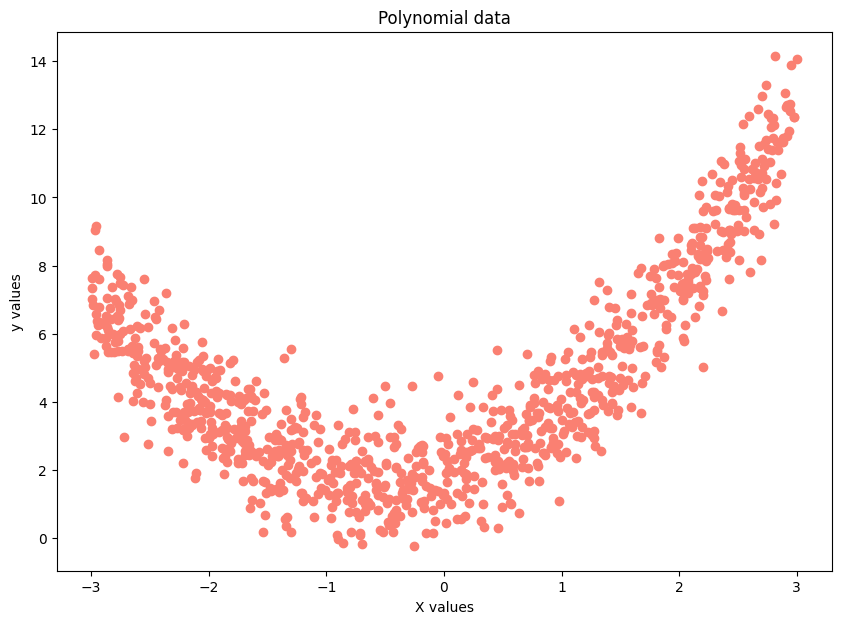

In [ ]:
# Plot the data
plt.figure(figsize = (10,7))
plt.scatter(X, y, color = 'salmon')
plt.title('Polynomial data')
plt.xlabel('X values')
plt.ylabel('y values')
plt.show()

In [ ]:
# Split the data
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X, y,
                                         test_size = 0.2)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
# Lets make a function with a pipeline to standardize and fit the model
def polynomial_regression(degree, X_train, y_train, X_test):

  # Instantiate a polynomial class object and linear regression object
  polynomial_features = PolynomialFeatures(degree = degree, include_bias = True)

  # Fit and transform the polynomial data the model on the data
  X_train_poly = polynomial_features.fit_transform(X_train)
  X_test_poly = polynomial_features.transform(X_test)

  # Create a Linear Regression object
  linear_regression = LinearRegression()

  # Fit the transformed polynomial data on the LR object
  linear_regression.fit(X_train_poly, y_train)

  # Make predictions on the test data
  y_preds = linear_regression.predict(X_test_poly)

  # Plot the predictions
  plt.figure(figsize = (10, 7))
  plt.scatter(X_train, y_train, c = 'salmon', label = 'Training points')
  plt.scatter(X_test, y_test, c = 'darkred', label = 'Testing points')
  plt.scatter(X_test, y_preds, c = 'darkblue', label = 'Predictions')
  plt.title(f'R2 Score: {np.round(r2_score(y_test, y_preds), 5)}')
  plt.legend()
  plt.show()

  return y_preds, polynomial_features

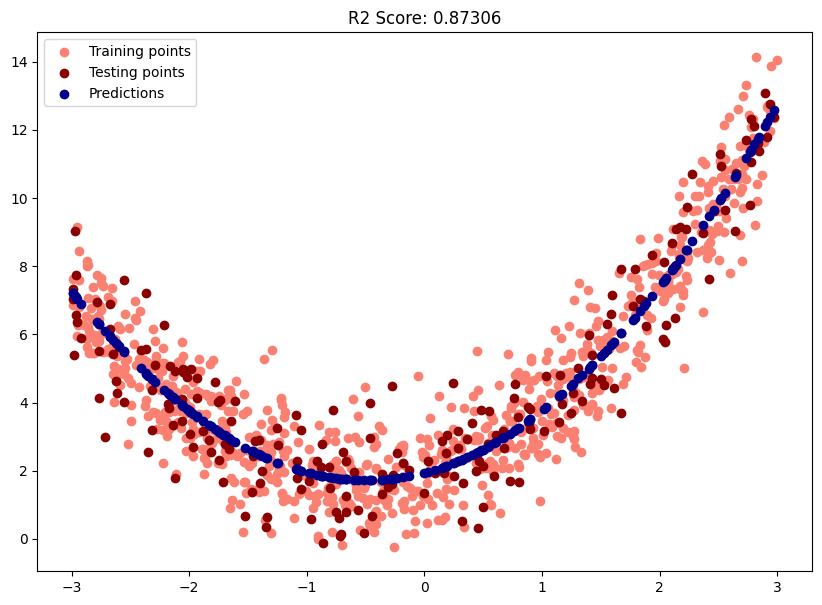

In [ ]:
# plot the model for different values of degree, degree = 4
y_preds, poly = polynomial_regression(degree = 4,
                                X_train = X_train,
                                y_train = y_train,
                                X_test = X_test)

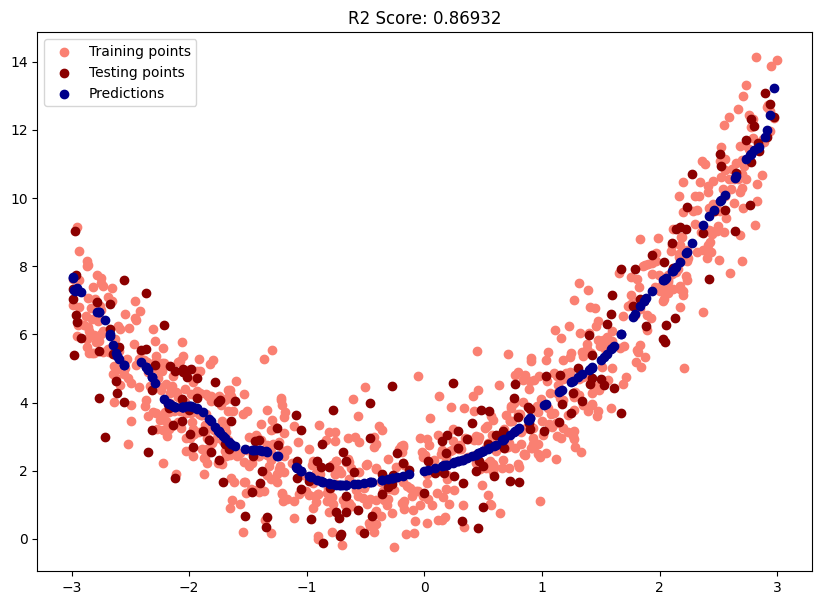

In [ ]:
# When you keep a higher values of degree, the models starts overfitting
y_preds, poly = polynomial_regression(degree = 33,
                                X_train = X_train,
                                y_train = y_train,
                                X_test = X_test)

In [ ]:
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 1
Ouput 34
Powers
 [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]]
